In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import  KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = pd.read_csv('income.csv')
data.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


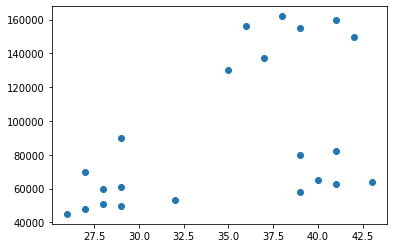

In [ ]:
plt.scatter(data['Age'] , data['Income($)'])
plt.show()

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_Predict = km.fit_predict(data[['Age' ,'Income($)']])

In [ ]:
data['Clusters'] = y_Predict

In [ ]:
data.head()

,Name,Age,Income($),Clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
data.dtypes

Name         object
Age           int64
Income($)     int64
Clusters      int32
dtype: object

In [ ]:
data['Clusters'].value_counts()

0    11
1     7
2     4
Name: Clusters, dtype: int64

<BarContainer object of 22 artists>

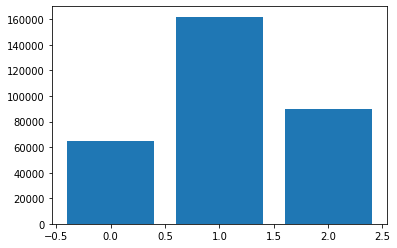

In [ ]:
plt.bar(data['Clusters'] , data['Income($)'])

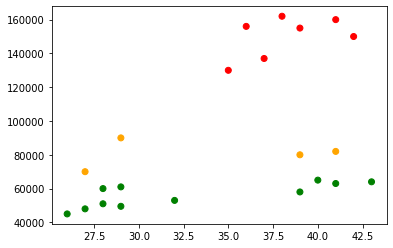

In [ ]:
color = {0:'green' , 1:'red' ,2:'orange'}
plt.scatter(data['Age'] , data['Income($)'] ,c=data['Clusters'].apply(lambda x:color[x]))
plt.show()

In [ ]:
scalar = MinMaxScaler()
data['Income($)'] = scalar.fit_transform(data[['Income($)']])
data['Age'] = scalar.fit_transform(data[['Age']])

In [ ]:
data.head()

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
predicted = km.fit_predict(data[['Age' , 'Income($)']])
predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
data['New'] = predicted

In [ ]:
data.head()

,Name,Age,Income($),Clusters,New
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,2,0
3,Ismail,0.117647,0.128205,2,0
4,Kory,0.941176,0.897436,1,2


<function matplotlib.pyplot.plot>

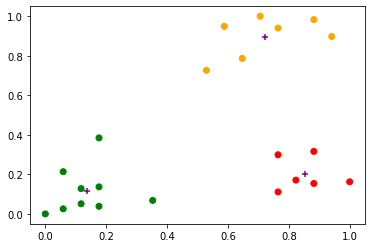

In [ ]:
plt.scatter(data['Age'] , data['Income($)'] , c=data['New'].apply(lambda x:color[x]))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1] , marker='+' , color='purple')
plt.plot

#Plotting Elbow plot

In [ ]:
l1 =[]
k_rng = range(1,10)
for i in k_rng:
  km = KMeans(n_clusters=i)
  km.fit(data[['Age' , 'Income($)']])
  l1.append(km.inertia_)


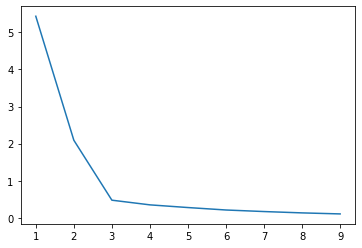

In [ ]:
plt.plot(k_rng , l1)

#Exercise

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
data1 = pd.DataFrame(iris.data , columns=iris.feature_names)

In [ ]:
data1 = data1.drop(['petal length (cm)' ,'petal width (cm)'] ,axis=1)

KeyError: ignored

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
km = KMeans(n_clusters=3)
predict = km.fit_predict(data1[['sepal length (cm)' ,'sepal width (cm)']])

In [ ]:
data1['Clusters'] = predict

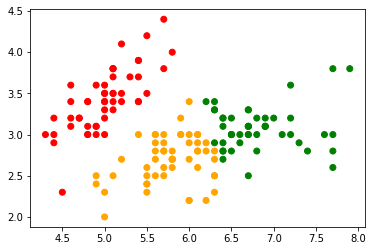

In [ ]:
plt.scatter(data1['sepal length (cm)'] ,data1['sepal width (cm)'] , c=data1['Clusters'].apply(lambda x: color[x]))

In [ ]:
l1 =[]
k_rng = range(1,10)
for i in k_rng:
  km = KMeans(n_clusters=i)
  km.fit(data1[['sepal length (cm)' , 'sepal width (cm)']])
  l1.append(km.inertia_)

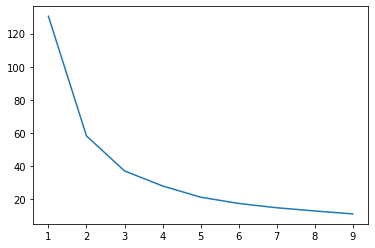

In [ ]:
plt.plot(k_rng , l1)

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),Clusters
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [ ]:
data1['Target'] = iris.target

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),Clusters,Target
0,5.1,3.5,1,0
1,4.9,3.0,1,0
2,4.7,3.2,1,0
3,4.6,3.1,1,0
4,5.0,3.6,1,0


In [ ]:
data1[data1['Clusters']==1].shape

(50, 4)